Loading functions

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from dual import *

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
def voice_prep(data, features):
      
    data_size = len(data.index)

    voice_X = data.iloc[:, :-1]
    voice_y = data.iloc[:, -1]

    # code categories to -1/1
    gender_encoder = LabelEncoder()
    voice_y = np.array(gender_encoder.fit_transform(voice_y))
    voice_y = voice_y * 2 - 1

    # normalize data
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler.fit(voice_X)
    voice_X = np.array(scaler.transform(voice_X))
    voice_X = voice_X[:,0:features]
    
    return voice_X, voice_y



# Phi function calc

In [4]:
def rand_bin_array(K, N):
    arr = np.zeros(N)
    arr[:K]  = 1
    np.random.shuffle(arr)
    return arr

In [5]:
feat = 2

voice_shuffle = load_file('voice_numsamp_shuffle_full')
voice_X, voice_y = voice_prep(voice_shuffle, feat)


data_x = voice_X
data_y = voice_y

BOUNDS = np.array([1e-12, 0.5, 1.0])
MARGINS = np.array([0, 0.5, 1.0, 2.0])

runs_per_sample = 10
maxiter = 1000
init_temp = 5500
accept = -5

pump_cycles = 1000

In [19]:
for pc in range(pump_cycles):
    for b in BOUNDS:
        for mar in MARGINS:

            DATA_SAVE_NAME = 'histories/voice_phi/voice_'+str(feat)+'_phi_m' + str(mar) + '_b' + str(b)

            try:
                history = load_file(DATA_SAVE_NAME)
            except:
                print('creating new file')
                history = list()

            
            mask = rand_bin_array(500, len(voice_shuffle))
            
            res = solve_outlier(data_x, data_y, mask, mar, b,
                    kwargs={'maxiter':maxiter, 'initial_temp':init_temp, 'accept':accept})
            print(pc, b, mar, '//', res.fun)
            history.append(-res.fun)

            save_file(DATA_SAVE_NAME, history)

0 1e-12 0.0 // -0.027997474747474743
0 1e-12 0.5 // -0.012698916290693751
0 1e-12 1.0 // -0.005456448768604405
0 1e-12 2.0 // -0.003121975615288153
0 0.5 0.0 // -0.06047727272727266
0 0.5 0.5 // -0.038638893005023434
0 0.5 1.0 // -0.02615479916728397
0 0.5 2.0 // -0.04659236806046141
0 1.0 0.0 // -0.07204292929292933
0 1.0 0.5 // -0.02825212662392218
0 1.0 1.0 // -0.011302352019111561
0 1.0 2.0 // -0.017648885976501827
1 1e-12 0.0 // -0.04882070707070707
1 1e-12 0.5 // -0.028377462188749925
1 1e-12 1.0 // -0.02373600878331561
1 1e-12 2.0 // -0.002888435097910258
1 0.5 0.0 // -0.0578030303030303
1 0.5 0.5 // -0.03362991725205944
1 0.5 1.0 // -0.034270947839192156
1 0.5 2.0 // -0.019671296980800168
1 1.0 0.0 // -0.06846464646464645
1 1.0 0.5 // -0.03416746641398294
1 1.0 1.0 // -0.01947072185094867
1 1.0 2.0 // -0.04727154730208866
2 1e-12 0.0 // -0.02929292929292926
2 1e-12 0.5 // -0.03264052315727084
2 1e-12 1.0 // -0.011977660752046093
2 1e-12 2.0 // -0.004810621634383616
2 0.5 0.0 //

19 1e-12 1.0 // -0.017146352286160016
19 1e-12 2.0 // -0.004452679502643497
19 0.5 0.0 // -0.05222979797979793
19 0.5 0.5 // -0.01675223884705812
19 0.5 1.0 // -0.018614883356118384
19 0.5 2.0 // -0.036605928019788014
19 1.0 0.0 // -0.05076010101010098
19 1.0 0.5 // -0.02047878522577329
19 1.0 1.0 // -0.015144371677536128
19 1.0 2.0 // -0.018590935582716017
20 1e-12 0.0 // -0.021305555555555578
20 1e-12 0.5 // -0.010029784935879693
20 1e-12 1.0 // -0.01997991174352065
20 1e-12 2.0 // -0.004384941668352349
20 0.5 0.0 // -0.07293434343434341
20 0.5 0.5 // -0.018607177847505763
20 0.5 1.0 // -0.04485108927041087
20 0.5 2.0 // -0.020457633433481393
20 1.0 0.0 // -0.03955303030303026
20 1.0 0.5 // -0.022534213418165305
20 1.0 1.0 // -0.02475010023587987
20 1.0 2.0 // -0.014341461585310356
21 1e-12 0.0 // -0.05610101010101004
21 1e-12 0.5 // -0.022584299131833907
21 1e-12 1.0 // -0.005051146943331308
21 1e-12 2.0 // -0.008711938529251562
21 0.5 0.0 // -0.05153030303030304
21 0.5 0.5 // -0.03

38 1e-12 0.5 // -0.03169675983510645
38 1e-12 1.0 // -0.013116534382785705
38 1e-12 2.0 // -0.006841928513452333
38 0.5 0.0 // -0.07294444444444442
38 0.5 0.5 // -0.026731091263383078
38 0.5 1.0 // -0.007161974308950159
38 0.5 2.0 // -0.029465494446521856
38 1.0 0.0 // -0.056474747474747455
38 1.0 0.5 // -0.032909414856585606
38 1.0 1.0 // -0.011154588432193635
38 1.0 2.0 // -0.046897456856806186
39 1e-12 0.0 // -0.055893939393939496
39 1e-12 0.5 // -0.009409402006257395
39 1e-12 1.0 // -0.00874758323324698
39 1e-12 2.0 // -0.0019753472707257913
39 0.5 0.0 // -0.053646464646464664
39 0.5 0.5 // -0.03908896582988164
39 0.5 1.0 // -0.052602715987209836
39 0.5 2.0 // -0.01399299059770931
39 1.0 0.0 // -0.05870707070707071
39 1.0 0.5 // -0.034095835380193895
39 1.0 1.0 // -0.036433300721738116
39 1.0 2.0 // -0.006435818386228753
40 1e-12 0.0 // -0.05307828282828281
40 1e-12 0.5 // -0.021878837265022044
40 1e-12 1.0 // -0.008789282802360465
40 1e-12 2.0 // -0.00497117448770279
40 0.5 0.0 //

57 1e-12 0.0 // -0.04008585858585856
57 1e-12 0.5 // -0.010884382711941254
57 1e-12 1.0 // -0.018269774345539225
57 1e-12 2.0 // -0.017297302977531737
57 0.5 0.0 // -0.06784343434343437
57 0.5 0.5 // -0.03422471117532111
57 0.5 1.0 // -0.01624004847531868
57 0.5 2.0 // -0.011781567199503074
57 1.0 0.0 // -0.04422222222222216
57 1.0 0.5 // -0.03250019383424929
57 1.0 1.0 // -0.016437954413881517
57 1.0 2.0 // -0.019657678013543678
58 1e-12 0.0 // -0.05433333333333329
58 1e-12 0.5 // -0.012623160206147288
58 1e-12 1.0 // -0.014919117483867095
58 1e-12 2.0 // -0.008153574542216435
58 0.5 0.0 // -0.04588636363636367
58 0.5 0.5 // -0.02012044037952443
58 0.5 1.0 // -0.027087194955251914
58 0.5 2.0 // -0.048252263191096545
58 1.0 0.0 // -0.04509343434343438
58 1.0 0.5 // -0.023512228380906497
58 1.0 1.0 // -0.0560484387984892
58 1.0 2.0 // -0.017352775561698897
59 1e-12 0.0 // -0.047037878787878795
59 1e-12 0.5 // -0.01391585889502267
59 1e-12 1.0 // -0.014791601133235077
59 1e-12 2.0 // -0.

75 1.0 2.0 // -0.019539669127751735
76 1e-12 0.0 // -0.027843434343434392
76 1e-12 0.5 // -0.015920418059494512
76 1e-12 1.0 // -0.022171817043198816
76 1e-12 2.0 // -0.006551348364797094
76 0.5 0.0 // -0.0421792929292929
76 0.5 0.5 // -0.018349421216738104
76 0.5 1.0 // -0.01792517543099531
76 0.5 2.0 // -0.03061013311436217
76 1.0 0.0 // -0.0374469696969697
76 1.0 0.5 // -0.021523924237533576
76 1.0 1.0 // -0.03828618003811968
76 1.0 2.0 // -0.01084745351212435
77 1e-12 0.0 // -0.030613636363636343
77 1e-12 0.5 // -0.021312657395597068
77 1e-12 1.0 // -0.0012301988905724093
77 1e-12 2.0 // -0.004242729819453173
77 0.5 0.0 // -0.05415404040404048
77 0.5 0.5 // -0.01494539199886824
77 0.5 1.0 // -0.022764216570294704
77 0.5 2.0 // -0.05207233591797378
77 1.0 0.0 // -0.06691161616161612
77 1.0 0.5 // -0.023519486202425055
77 1.0 1.0 // -0.012055601707375074
77 1.0 2.0 // -0.08210883883513731
78 1e-12 0.0 // -0.05036111111111119
78 1e-12 0.5 // -0.02617389595171893
78 1e-12 1.0 // -0.027

94 1.0 1.0 // -0.019840857542668844
94 1.0 2.0 // -0.015275425314807856
95 1e-12 0.0 // -0.0638333333333333
95 1e-12 0.5 // -0.015083849095087865
95 1e-12 1.0 // -0.008866389379079687
95 1e-12 2.0 // -0.014318415833137865
95 0.5 0.0 // -0.032941919191919244
95 0.5 0.5 // -0.04663901613810939
95 0.5 1.0 // -0.013310047137330194
95 0.5 2.0 // -0.02648637201848325
95 1.0 0.0 // -0.07475505050505049
95 1.0 0.5 // -0.029706696293889
95 1.0 1.0 // -0.01637989788375399
95 1.0 2.0 // -0.008932846400182326
96 1e-12 0.0 // -0.03434848484848485
96 1e-12 0.5 // -0.010967604582624801
96 1e-12 1.0 // -0.015321009685395737
96 1e-12 2.0 // -0.0058760789007676895
96 0.5 0.0 // -0.04779545454545453
96 0.5 0.5 // -0.023894923406108437
96 0.5 1.0 // -0.02141605449525108
96 0.5 2.0 // -0.04750725407251577
96 1.0 0.0 // -0.07618939393939395
96 1.0 0.5 // -0.03066307157873205
96 1.0 1.0 // -0.01724913678064921
96 1.0 2.0 // -0.004040575018787518
97 1e-12 0.0 // -0.0313661616161616
97 1e-12 0.5 // -0.02963904

113 0.5 0.0 // -0.0669621212121212
113 0.5 0.5 // -0.018303952733571438
113 0.5 1.0 // -0.018031408745393884
113 0.5 2.0 // -0.017039025418874476
113 1.0 0.0 // -0.04884595959595961
113 1.0 0.5 // -0.02782163931558257
113 1.0 1.0 // -0.024905525506333848
113 1.0 2.0 // -0.01529000030745975
114 1e-12 0.0 // -0.03804040404040404
114 1e-12 0.5 // -0.0208473145427025
114 1e-12 1.0 // -0.01694720448434006
114 1e-12 2.0 // -0.005534844487222412
114 0.5 0.0 // -0.0398459595959596
114 0.5 0.5 // -0.03582598476826515
114 0.5 1.0 // -0.026906126753732162
114 0.5 2.0 // -0.02610306965946263
114 1.0 0.0 // -0.07498989898989905
114 1.0 0.5 // -0.026382099244823043
114 1.0 1.0 // -0.029031121436961738
114 1.0 2.0 // -0.007660446584837666
115 1e-12 0.0 // -0.03595959595959586
115 1e-12 0.5 // -0.008970652246813482
115 1e-12 1.0 // -0.012571236549113851
115 1e-12 2.0 // -0.004771275265527564
115 0.5 0.0 // -0.04649494949494948
115 0.5 0.5 // -0.02549193623440882
115 0.5 1.0 // -0.012752536826546645
11

131 1.0 0.0 // -0.03941919191919191
131 1.0 0.5 // -0.027612836902247362
131 1.0 1.0 // -0.01889396642875718
131 1.0 2.0 // -0.02828551584902783
132 1e-12 0.0 // -0.04065909090909087
132 1e-12 0.5 // -0.03360845042381688
132 1e-12 1.0 // -0.0017957221406175172
132 1e-12 2.0 // -0.007725003997777757
132 0.5 0.0 // -0.05560353535353535
132 0.5 0.5 // -0.03172544744086647
132 0.5 1.0 // -0.012686098967149229
132 0.5 2.0 // -0.0054316597163928115
132 1.0 0.0 // -0.04197222222222219
132 1.0 0.5 // -0.0321653930990744
132 1.0 1.0 // -0.016723615558460247
132 1.0 2.0 // -0.01437051873941897
133 1e-12 0.0 // -0.03708080808080805
133 1e-12 0.5 // -0.020957579667580606
133 1e-12 1.0 // -0.009816541376528654
133 1e-12 2.0 // -0.012415222525706926
133 0.5 0.0 // -0.030022727272727312
133 0.5 0.5 // -0.02945090445262777
133 0.5 1.0 // -0.036948044296024496
133 0.5 2.0 // -0.012106746969094084
133 1.0 0.0 // -0.041946969696969705
133 1.0 0.5 // -0.04431640882203525
133 1.0 1.0 // -0.0384392391619692

150 1e-12 0.0 // -0.06353787878787881
150 1e-12 0.5 // -0.0046933841350255134
150 1e-12 1.0 // -0.005687966598752592
150 1e-12 2.0 // -0.0049663125032726185
150 0.5 0.0 // -0.04029040404040407
150 0.5 0.5 // -0.03007042345365657
150 0.5 1.0 // -0.025060366515022192
150 0.5 2.0 // -0.007556498660981292
150 1.0 0.0 // -0.05277020202020205
150 1.0 0.5 // -0.015462904443070857
150 1.0 1.0 // -0.02208416751897324
150 1.0 2.0 // -0.02205414769501257
151 1e-12 0.0 // -0.03987373737373734
151 1e-12 0.5 // -0.013627029190475981
151 1e-12 1.0 // -0.01908188032285485
151 1e-12 2.0 // -0.005878853223692637
151 0.5 0.0 // -0.036898989898989876
151 0.5 0.5 // -0.02258869251565243
151 0.5 1.0 // -0.019342790958006173
151 0.5 2.0 // -0.019752798102809832
151 1.0 0.0 // -0.039116161616161604
151 1.0 0.5 // -0.0329288484517154
151 1.0 1.0 // -0.038744545821272625
151 1.0 2.0 // -0.01444776095232081
152 1e-12 0.0 // -0.022752525252525246
152 1e-12 0.5 // -0.02014164054091161
152 1e-12 1.0 // -0.006871270

168 0.5 0.0 // -0.07271717171717171
168 0.5 0.5 // -0.0616303636833786
168 0.5 1.0 // -0.049220885890591815
168 0.5 2.0 // -0.02644135446177276
168 1.0 0.0 // -0.04364898989898991
168 1.0 0.5 // -0.03276676480136864
168 1.0 1.0 // -0.02590160083152615
168 1.0 2.0 // -0.022951763591949392
169 1e-12 0.0 // -0.025474747474747483
169 1e-12 0.5 // -0.019102584116661103
169 1e-12 1.0 // -0.009463766620100511
169 1e-12 2.0 // -0.000540318045478716
169 0.5 0.0 // -0.04441919191919197
169 0.5 0.5 // -0.029075259482214566
169 0.5 1.0 // -0.02664601170193015
169 0.5 2.0 // -0.03089532382141158
169 1.0 0.0 // -0.060848484848484874
169 1.0 0.5 // -0.015335628026500125
169 1.0 1.0 // -0.053684321642321675
169 1.0 2.0 // -0.013700434604512979
170 1e-12 0.0 // -0.030118686868686906
170 1e-12 0.5 // -0.011315357986883101
170 1e-12 1.0 // -0.020147710417722675
170 1e-12 2.0 // -0.0016898722084204287
170 0.5 0.0 // -0.05366161616161613
170 0.5 0.5 // -0.014245677806743684
170 0.5 1.0 // -0.02147566424080

186 1.0 0.5 // -0.013658316400535497
186 1.0 1.0 // -0.034631505187566414
186 1.0 2.0 // -0.007891154006945844
187 1e-12 0.0 // -0.0266212121212121
187 1e-12 0.5 // -0.023486508742061818
187 1e-12 1.0 // -0.009619751154870237
187 1e-12 2.0 // -0.011353596744270833
187 0.5 0.0 // -0.03907323232323234
187 0.5 0.5 // -0.026967423937143353
187 0.5 1.0 // -0.04434894570158804
187 0.5 2.0 // -0.03295030356537032
187 1.0 0.0 // -0.03326515151515147
187 1.0 0.5 // -0.01489813101227877
187 1.0 1.0 // -0.017211276451010393
187 1.0 2.0 // -0.004540330581609187
188 1e-12 0.0 // -0.025128787878787806
188 1e-12 0.5 // -0.01441161818935377
188 1e-12 1.0 // -0.008989600891336935
188 1e-12 2.0 // -0.005809980613725618
188 0.5 0.0 // -0.03665656565656561
188 0.5 0.5 // -0.026170723080012115
188 0.5 1.0 // -0.03710438791504156
188 0.5 2.0 // -0.013369688882753139
188 1.0 0.0 // -0.04537878787878791
188 1.0 0.5 // -0.02149759976372978
188 1.0 1.0 // -0.03687615692655627
188 1.0 2.0 // -0.02388268832645734

205 1e-12 0.5 // -0.01583769710528493
205 1e-12 1.0 // -0.006241596992008214
205 1e-12 2.0 // -0.00409428948685886
205 0.5 0.0 // -0.06684848484848488
205 0.5 0.5 // -0.027450744232281776
205 0.5 1.0 // -0.019581732370522298
205 0.5 2.0 // -0.00913638487818147
205 1.0 0.0 // -0.04358333333333331
205 1.0 0.5 // -0.022210396093031992
205 1.0 1.0 // -0.027825482779834543
205 1.0 2.0 // -0.014407479524359779
206 1e-12 0.0 // -0.05189898989898989
206 1e-12 0.5 // -0.040957488651187424
206 1e-12 1.0 // -0.010118308972815182
206 1e-12 2.0 // -0.0030579648779924806
206 0.5 0.0 // -0.06062878787878784
206 0.5 0.5 // -0.023906535843951193
206 0.5 1.0 // -0.004070103575888995
206 0.5 2.0 // -0.006039685599696254
206 1.0 0.0 // -0.04410353535353534
206 1.0 0.5 // -0.024359178955320138
206 1.0 1.0 // -0.02172796649388714
206 1.0 2.0 // -0.018979058054055087
207 1e-12 0.0 // -0.02896464646464647
207 1e-12 0.5 // -0.008226131602941278
207 1e-12 1.0 // -0.009030525838290449
207 1e-12 2.0 // -0.0143605

223 0.5 0.5 // -0.011615901585954824
223 0.5 1.0 // -0.0069628071727959595
223 0.5 2.0 // -0.007856410423189852
223 1.0 0.0 // -0.054684343434343474
223 1.0 0.5 // -0.03109954725706565
223 1.0 1.0 // -0.01974932792719908
223 1.0 2.0 // -0.01049437061187175
224 1e-12 0.0 // -0.02495959595959596
224 1e-12 0.5 // -0.01081714443413928
224 1e-12 1.0 // -0.010477430481806382
224 1e-12 2.0 // -0.0033198991571562475
224 0.5 0.0 // -0.04868181818181816
224 0.5 0.5 // -0.023256918395491488
224 0.5 1.0 // -0.014075035600797925
224 0.5 2.0 // -0.011905778061614303
224 1.0 0.0 // -0.04502020202020207
224 1.0 0.5 // -0.030723836994227427
224 1.0 1.0 // -0.019834143899499113
224 1.0 2.0 // -0.008919368849165221
225 1e-12 0.0 // -0.047760101010100975
225 1e-12 0.5 // -0.01009350557730393
225 1e-12 1.0 // -0.006005132913642797
225 1e-12 2.0 // -0.002286786985225109
225 0.5 0.0 // -0.03893686868686874
225 0.5 0.5 // -0.020439857969389075
225 0.5 1.0 // -0.036164119100951186
225 0.5 2.0 // -0.02071321223

241 1.0 0.5 // -0.026873538350085657
241 1.0 1.0 // -0.02944575798835225
241 1.0 2.0 // -0.03429944475774416
242 1e-12 0.0 // -0.04733080808080803
242 1e-12 0.5 // -0.03921896998905505
242 1e-12 1.0 // -0.017296861754537596
242 1e-12 2.0 // -0.003315832262427043
242 0.5 0.0 // -0.059381313131313174
242 0.5 0.5 // -0.015163095908605317
242 0.5 1.0 // -0.014640404620226866
242 0.5 2.0 // -0.021697341572000428
242 1.0 0.0 // -0.05333080808080809
242 1.0 0.5 // -0.03531758329617307
242 1.0 1.0 // -0.014575367842008857
242 1.0 2.0 // -0.03736001401261152
243 1e-12 0.0 // -0.04935101010101006
243 1e-12 0.5 // -0.015518250695954916
243 1e-12 1.0 // -0.009547402009286943
243 1e-12 2.0 // -0.0067245160255067216
243 0.5 0.0 // -0.04731565656565656
243 0.5 0.5 // -0.017548501271248296
243 0.5 1.0 // -0.03848258156677997
243 0.5 2.0 // -0.02091529147435489
243 1.0 0.0 // -0.04820454545454539
243 1.0 0.5 // -0.029941620405418812
243 1.0 1.0 // -0.031104937528845633
243 1.0 2.0 // -0.022676894064007

260 1e-12 0.5 // -0.03910035138118406
260 1e-12 1.0 // -0.009240971026693967
260 1e-12 2.0 // -0.001680424259033475
260 0.5 0.0 // -0.04890656565656565
260 0.5 0.5 // -0.02308594956719795
260 0.5 1.0 // -0.043530326356008064
260 0.5 2.0 // -0.0059236696541763445
260 1.0 0.0 // -0.046744949494949506
260 1.0 0.5 // -0.023084651008680623
260 1.0 1.0 // -0.048191176527179136
260 1.0 2.0 // -0.00679234930607131
261 1e-12 0.0 // -0.03752272727272732
261 1e-12 0.5 // -0.013979262338284504
261 1e-12 1.0 // -0.012526648127210604
261 1e-12 2.0 // -0.005631596346597489
261 0.5 0.0 // -0.040477272727272695
261 0.5 0.5 // -0.021923696567677453
261 0.5 1.0 // -0.029818912154026433
261 0.5 2.0 // -0.005265937840736923
261 1.0 0.0 // -0.055426767676767574
261 1.0 0.5 // -0.03931352091182583
261 1.0 1.0 // -0.03235182617673105
261 1.0 2.0 // -0.01971801177895116
262 1e-12 0.0 // -0.03089898989898987
262 1e-12 0.5 // -0.009685995227415978
262 1e-12 1.0 // -0.016713243332686423
262 1e-12 2.0 // -0.010543

278 0.5 0.5 // -0.027366807133789472
278 0.5 1.0 // -0.03712717747002103
278 0.5 2.0 // -0.01417135649020096
278 1.0 0.0 // -0.050815656565656564
278 1.0 0.5 // -0.02550448010537182
278 1.0 1.0 // -0.019996527215988658
278 1.0 2.0 // -0.022175461668393515
279 1e-12 0.0 // -0.03214393939393945
279 1e-12 0.5 // -0.006312374791755504
279 1e-12 1.0 // -0.010453714506291623
279 1e-12 2.0 // -0.009570551285987272
279 0.5 0.0 // -0.07201010101010097
279 0.5 0.5 // -0.026325204657346002
279 0.5 1.0 // -0.05786595404401629
279 0.5 2.0 // -0.019675001597217134
279 1.0 0.0 // -0.04091919191919191
279 1.0 0.5 // -0.03571953421916396
279 1.0 1.0 // -0.0190343757756114
279 1.0 2.0 // -0.011400370122501169
280 1e-12 0.0 // -0.08992171717171721
280 1e-12 0.5 // -0.019456630946550812
280 1e-12 1.0 // -0.00830255705957439
280 1e-12 2.0 // -0.003170096692590496
280 0.5 0.0 // -0.042121212121212115
280 0.5 0.5 // -0.019119648382150967
280 0.5 1.0 // -0.020569259485981595
280 0.5 2.0 // -0.0141243473602208

296 1.0 0.5 // -0.02214325949390561
296 1.0 1.0 // -0.03308013863255288
296 1.0 2.0 // -0.0328319916748534
297 1e-12 0.0 // -0.02509848484848487
297 1e-12 0.5 // -0.04243039177026098
297 1e-12 1.0 // -0.011300064549258804
297 1e-12 2.0 // -0.0012313260668719295
297 0.5 0.0 // -0.047618686868686866
297 0.5 0.5 // -0.018669502518587677
297 0.5 1.0 // -0.021994731587198113
297 0.5 2.0 // -0.020010612642037184
297 1.0 0.0 // -0.0507070707070707
297 1.0 0.5 // -0.021815074303393023
297 1.0 1.0 // -0.019793454621896744
297 1.0 2.0 // -0.014522578026200494
298 1e-12 0.0 // -0.03578030303030305
298 1e-12 0.5 // -0.016497618162748084
298 1e-12 1.0 // -0.0208032714312969
298 1e-12 2.0 // -0.0005212975282262722
298 0.5 0.0 // -0.06404545454545463
298 0.5 0.5 // -0.03493678006627121
298 0.5 1.0 // -0.023787320241893783
298 0.5 2.0 // -0.015398980533387618
298 1.0 0.0 // -0.04662373737373737
298 1.0 0.5 // -0.04350261104202802
298 1.0 1.0 // -0.016244992140343806
298 1.0 2.0 // -0.00915204731435648

315 1e-12 0.5 // -0.03171206578865715
315 1e-12 1.0 // -0.006211392457727172
315 1e-12 2.0 // -0.004619025927168341
315 0.5 0.0 // -0.04689141414141412
315 0.5 0.5 // -0.025429971720162592
315 0.5 1.0 // -0.007056184881343186
315 0.5 2.0 // -0.006251888469116951
315 1.0 0.0 // -0.06781818181818178
315 1.0 0.5 // -0.02776417195405223
315 1.0 1.0 // -0.021205629074598664
315 1.0 2.0 // -0.031053621233796902
316 1e-12 0.0 // -0.03344191919191919
316 1e-12 0.5 // -0.01680618336072215
316 1e-12 1.0 // -0.010233660968615998
316 1e-12 2.0 // -0.008172267287955282
316 0.5 0.0 // -0.041411616161616205
316 0.5 0.5 // -0.03859259883564847
316 0.5 1.0 // -0.027061542716844467
316 0.5 2.0 // -0.05425025926905186
316 1.0 0.0 // -0.04745202020202022
316 1.0 0.5 // -0.03388325566588013
316 1.0 1.0 // -0.02176413022859447
316 1.0 2.0 // -0.01614176114782684
317 1e-12 0.0 // -0.022656565656565653
317 1e-12 0.5 // -0.016120565572085188
317 1e-12 1.0 // -0.002570439469648189
317 1e-12 2.0 // -0.0014989304

333 0.5 0.5 // -0.022241879077794846
333 0.5 1.0 // -0.025113258861911292
333 0.5 2.0 // -0.003419252133439077
333 1.0 0.0 // -0.03626262626262622
333 1.0 0.5 // -0.01786909101641232
333 1.0 1.0 // -0.0329633981908416
333 1.0 2.0 // -0.013688901380985774
334 1e-12 0.0 // -0.03174242424242424
334 1e-12 0.5 // -0.03328770429522043
334 1e-12 1.0 // -0.02314187418813285
334 1e-12 2.0 // -0.0031291212108618405
334 0.5 0.0 // -0.04439393939393943
334 0.5 0.5 // -0.019994739734035982
334 0.5 1.0 // -0.03975397643749112
334 0.5 2.0 // -0.023295815404264064
334 1.0 0.0 // -0.052878787878787914
334 1.0 0.5 // -0.026537039439583354
334 1.0 1.0 // -0.010046068084197057
334 1.0 2.0 // -0.01427587585129414
335 1e-12 0.0 // -0.03116919191919193
335 1e-12 0.5 // -0.010898763918414489
335 1e-12 1.0 // -0.004983346472049677
335 1e-12 2.0 // -0.0036616183153636017
335 0.5 0.0 // -0.04548232323232326
335 0.5 0.5 // -0.01708609833260133
335 0.5 1.0 // -0.026021809888826852
335 0.5 2.0 // -0.014612104424864

351 1.0 0.5 // -0.03601281584532856
351 1.0 1.0 // -0.02084278269001727
351 1.0 2.0 // -0.03452495315901932
352 1e-12 0.0 // -0.02125757575757581
352 1e-12 0.5 // -0.012003826324101907
352 1e-12 1.0 // -0.005784961859756077
352 1e-12 2.0 // -0.0027699126629986415
352 0.5 0.0 // -0.04819696969696971
352 0.5 0.5 // -0.05668065800501504
352 0.5 1.0 // -0.019503366819108692
352 0.5 2.0 // -0.015461699356209446
352 1.0 0.0 // -0.04847727272727276
352 1.0 0.5 // -0.013712650033889218
352 1.0 1.0 // -0.027290439338076955
352 1.0 2.0 // -0.006692712114117927
353 1e-12 0.0 // -0.05086363636363633
353 1e-12 0.5 // -0.018215661889722123
353 1e-12 1.0 // -0.004486393395681132
353 1e-12 2.0 // -0.002160178740200913
353 0.5 0.0 // -0.0297146464646465
353 0.5 0.5 // -0.035389721255598805
353 0.5 1.0 // -0.013129358604912711
353 0.5 2.0 // -0.017085343530697128
353 1.0 0.0 // -0.039626262626262676
353 1.0 0.5 // -0.020604801083441204
353 1.0 1.0 // -0.018057204081690204
353 1.0 2.0 // -0.0334163424973

370 1e-12 1.0 // -0.01695291644723773
370 1e-12 2.0 // -0.0034327149616819597
370 0.5 0.0 // -0.03837373737373734
370 0.5 0.5 // -0.02884445975571459
370 0.5 1.0 // -0.029293500574676168
370 0.5 2.0 // -0.018169863648081153
370 1.0 0.0 // -0.06668686868686868
370 1.0 0.5 // -0.029050765085739005
370 1.0 1.0 // -0.012558713687957135
370 1.0 2.0 // -0.02566386457764669
371 1e-12 0.0 // -0.0346489898989899
371 1e-12 0.5 // -0.00904271116012556
371 1e-12 1.0 // -0.0026849429292395977
371 1e-12 2.0 // -0.013495077601925698
371 0.5 0.0 // -0.05366161616161613
371 0.5 0.5 // -0.020135344441863712
371 0.5 1.0 // -0.019368747096685457
371 0.5 2.0 // -0.016472646690428028
371 1.0 0.0 // -0.05651515151515152
371 1.0 0.5 // -0.038182202838852874
371 1.0 1.0 // -0.013410917121436827
371 1.0 2.0 // -0.031994892620968884
372 1e-12 0.0 // -0.030421717171717183
372 1e-12 0.5 // -0.006137596077430696
372 1e-12 1.0 // -0.0035537774791237764
372 1e-12 2.0 // -0.0027895736853414954
372 0.5 0.0 // -0.044734

388 0.5 2.0 // -0.02540443714682672
388 1.0 0.0 // -0.0292828282828283
388 1.0 0.5 // -0.021886299139274645
388 1.0 1.0 // -0.040258114914119736
388 1.0 2.0 // -0.01948539741378741
389 1e-12 0.0 // -0.03302020202020195
389 1e-12 0.5 // -0.014651011190918162
389 1e-12 1.0 // -0.011080088200132732
389 1e-12 2.0 // -0.005151516945273715
389 0.5 0.0 // -0.06607070707070706
389 0.5 0.5 // -0.03709169869595219
389 0.5 1.0 // -0.012780914655950104
389 0.5 2.0 // -0.02054979371537058
389 1.0 0.0 // -0.07239141414141415
389 1.0 0.5 // -0.029198318357469888
389 1.0 1.0 // -0.037528824617739764
389 1.0 2.0 // -0.03388144499368334
390 1e-12 0.0 // -0.060073232323232306
390 1e-12 0.5 // -0.02545086885793224
390 1e-12 1.0 // -0.007236882156510416
390 1e-12 2.0 // -0.002140415639661053
390 0.5 0.0 // -0.052376262626262604
390 0.5 0.5 // -0.01814820940106293
390 0.5 1.0 // -0.021031915052339478
390 0.5 2.0 // -0.015709018889038417
390 1.0 0.0 // -0.08067929292929293
390 1.0 0.5 // -0.02614415284290017

407 1e-12 0.0 // -0.039881313131313156
407 1e-12 0.5 // -0.009975330466114096
407 1e-12 1.0 // -0.008033304574885491
407 1e-12 2.0 // -0.01996814618118159
407 0.5 0.0 // -0.045101010101010086
407 0.5 0.5 // -0.02529084918840696
407 0.5 1.0 // -0.010708889622963458
407 0.5 2.0 // -0.0415460214550285
407 1.0 0.0 // -0.04734848484848486
407 1.0 0.5 // -0.04625000259994383
407 1.0 1.0 // -0.05425049585239905
407 1.0 2.0 // -0.04680822137082702
408 1e-12 0.0 // -0.04377020202020199
408 1e-12 0.5 // -0.008261197369472062
408 1e-12 1.0 // -0.011728290929971297
408 1e-12 2.0 // -0.002313767949640222
408 0.5 0.0 // -0.05095202020202022
408 0.5 0.5 // -0.024831454924066687
408 0.5 1.0 // -0.015086223695180867
408 0.5 2.0 // -0.006605384838342165
408 1.0 0.0 // -0.06069949494949489
408 1.0 0.5 // -0.02399626221238027
408 1.0 1.0 // -0.021767921968786408
408 1.0 2.0 // -0.052618853807364085
409 1e-12 0.0 // -0.03872222222222221
409 1e-12 0.5 // -0.02775915789230965
409 1e-12 1.0 // -0.004157196114

425 0.5 0.5 // -0.025207564376951264
425 0.5 1.0 // -0.04130846960735979
425 0.5 2.0 // -0.014266006560751499
425 1.0 0.0 // -0.03683838383838389
425 1.0 0.5 // -0.029124489550157895
425 1.0 1.0 // -0.031362693667062236
425 1.0 2.0 // -0.042557500547313
426 1e-12 0.0 // -0.025742424242424233
426 1e-12 0.5 // -0.006613945903278684
426 1e-12 1.0 // -0.011911526006503137
426 1e-12 2.0 // -0.00822002332343108
426 0.5 0.0 // -0.054699494949495
426 0.5 0.5 // -0.02851561077386794
426 0.5 1.0 // -0.035716148276748516
426 0.5 2.0 // -0.010569363320802161
426 1.0 0.0 // -0.042146464646464654
426 1.0 0.5 // -0.03752937761637498
426 1.0 1.0 // -0.03896785456478313
426 1.0 2.0 // -0.044504040922980326
427 1e-12 0.0 // -0.04781060606060605
427 1e-12 0.5 // -0.028360749262022256
427 1e-12 1.0 // -0.023015107038956706
427 1e-12 2.0 // -0.004958152025844043
427 0.5 0.0 // -0.04273484848484849
427 0.5 0.5 // -0.023982803092491012
427 0.5 1.0 // -0.030769392134466278
427 0.5 2.0 // -0.03911666671275904


443 1.0 0.5 // -0.0640024794806121
443 1.0 1.0 // -0.015195408473946515
443 1.0 2.0 // -0.019283578247947464
444 1e-12 0.0 // -0.024436868686868674
444 1e-12 0.5 // -0.015409007349533987
444 1e-12 1.0 // -0.03580263140421702
444 1e-12 2.0 // -0.0037689488699041984
444 0.5 0.0 // -0.034732323232323226
444 0.5 0.5 // -0.05188230499900992
444 0.5 1.0 // -0.014523308699502913
444 0.5 2.0 // -0.010907906449078242
444 1.0 0.0 // -0.03780050505050503
444 1.0 0.5 // -0.01792857780740187
444 1.0 1.0 // -0.012462832279866665
444 1.0 2.0 // -0.022078729728232105
445 1e-12 0.0 // -0.03321464646464645
445 1e-12 0.5 // -0.01657727323706959
445 1e-12 1.0 // -0.010153293861312362
445 1e-12 2.0 // -0.0027734613823408027
445 0.5 0.0 // -0.04854040404040405
445 0.5 0.5 // -0.017846959223105086
445 0.5 1.0 // -0.014117696250455558
445 0.5 2.0 // -0.02279379826307082
445 1.0 0.0 // -0.04965404040404037
445 1.0 0.5 // -0.06502190231373733
445 1.0 1.0 // -0.020084742234701136
445 1.0 2.0 // -0.00888794311786

462 1e-12 0.5 // -0.01935203156840315
462 1e-12 1.0 // -0.03261242105767381
462 1e-12 2.0 // -0.004128881254108596
462 0.5 0.0 // -0.061136363636363655
462 0.5 0.5 // -0.01217117641080201
462 0.5 1.0 // -0.036815093056155934
462 0.5 2.0 // -0.021927860456993575
462 1.0 0.0 // -0.07834343434343438
462 1.0 0.5 // -0.03229597410378815
462 1.0 1.0 // -0.014743672509570538
462 1.0 2.0 // -0.012251105912991833
463 1e-12 0.0 // -0.027598484848484817
463 1e-12 0.5 // -0.005276533479474543
463 1e-12 1.0 // -0.014207918207321146
463 1e-12 2.0 // -0.0022821162346706725
463 0.5 0.0 // -0.07262121212121214
463 0.5 0.5 // -0.0499933079434729
463 0.5 1.0 // -0.03328120409764501
463 0.5 2.0 // -0.0194690877079029
463 1.0 0.0 // -0.055590909090909135
463 1.0 0.5 // -0.027801161379728878
463 1.0 1.0 // -0.02505274974646632
463 1.0 2.0 // -0.015775648025665667
464 1e-12 0.0 // -0.027583333333333404
464 1e-12 0.5 // -0.023198964373119746
464 1e-12 1.0 // -0.009071618112988844
464 1e-12 2.0 // -0.005086839

480 0.5 0.5 // -0.0194219858496274
480 0.5 1.0 // -0.028183786776352193
480 0.5 2.0 // -0.05029650602608865
480 1.0 0.0 // -0.057906565656565656
480 1.0 0.5 // -0.01802066926858059
480 1.0 1.0 // -0.024731870093413266
480 1.0 2.0 // -0.017126314695936284
481 1e-12 0.0 // -0.04465656565656562
481 1e-12 0.5 // -0.02366844131173118
481 1e-12 1.0 // -0.01381701278605596
481 1e-12 2.0 // -0.005158746773279543
481 0.5 0.0 // -0.0742929292929293
481 0.5 0.5 // -0.01704455394442128
481 0.5 1.0 // -0.018224361899753072
481 0.5 2.0 // -0.025445873507920824
481 1.0 0.0 // -0.02901262626262624
481 1.0 0.5 // -0.028540399218517254
481 1.0 1.0 // -0.046772998771127505
481 1.0 2.0 // -0.004728088537670705
482 1e-12 0.0 // -0.040866161616161634
482 1e-12 0.5 // -0.005751334179864953
482 1e-12 1.0 // -0.020159432307399583
482 1e-12 2.0 // -0.0030131919278302277
482 0.5 0.0 // -0.050416666666666665
482 0.5 0.5 // -0.03318256108984918
482 0.5 1.0 // -0.03848415968945218
482 0.5 2.0 // -0.0113019862236218

498 1.0 1.0 // -0.02164336223627128
498 1.0 2.0 // -0.01089576341245313
499 1e-12 0.0 // -0.03257070707070708
499 1e-12 0.5 // -0.03587240534130931
499 1e-12 1.0 // -0.006936312140048195
499 1e-12 2.0 // -0.0022182064917306565
499 0.5 0.0 // -0.05182828282828289
499 0.5 0.5 // -0.051171672348851394
499 0.5 1.0 // -0.022190609398489713
499 0.5 2.0 // -0.016013067772543188
499 1.0 0.0 // -0.050098484848484864
499 1.0 0.5 // -0.02493091073723841
499 1.0 1.0 // -0.016435510044579826
499 1.0 2.0 // -0.021586874013228896
500 1e-12 0.0 // -0.03789393939393948
500 1e-12 0.5 // -0.006698141892511611
500 1e-12 1.0 // -0.020828469562623075
500 1e-12 2.0 // -0.013444710158168616
500 0.5 0.0 // -0.05311616161616162
500 0.5 0.5 // -0.026315268176672624
500 0.5 1.0 // -0.021289453692342808
500 0.5 2.0 // -0.016405361814823105
500 1.0 0.0 // -0.050464646464646545
500 1.0 0.5 // -0.01606410104546191
500 1.0 1.0 // -0.013383699455268516
500 1.0 2.0 // -0.0059639251627391365
501 1e-12 0.0 // -0.029694444

517 1e-12 1.0 // -0.01273247264599231
517 1e-12 2.0 // -0.004463486907348768
517 0.5 0.0 // -0.054143939393939466
517 0.5 0.5 // -0.021326970695103142
517 0.5 1.0 // -0.013854741578567031
517 0.5 2.0 // -0.0133872588707169
517 1.0 0.0 // -0.05304040404040411
517 1.0 0.5 // -0.020354503004573754
517 1.0 1.0 // -0.03427160521736472
517 1.0 2.0 // -0.009413223512114044
518 1e-12 0.0 // -0.04945707070707073
518 1e-12 0.5 // 0.000803327949584598
518 1e-12 1.0 // -0.004794393294275445
518 1e-12 2.0 // -0.010807000306952919
518 0.5 0.0 // -0.05874242424242426
518 0.5 0.5 // -0.05772704587695898
518 0.5 1.0 // -0.008834458969561476
518 0.5 2.0 // -0.025123084525956407
518 1.0 0.0 // -0.03902272727272732
518 1.0 0.5 // -0.0538100126819509
518 1.0 1.0 // -0.044792420537426825
518 1.0 2.0 // -0.023292419113211782
519 1e-12 0.0 // -0.047797979797979784
519 1e-12 0.5 // -0.024608719228570997
519 1e-12 1.0 // -0.006523531296798057
519 1e-12 2.0 // -0.0011817381341461264
519 0.5 0.0 // -0.06363383838

535 0.5 1.0 // -0.023818332973214784
535 0.5 2.0 // -0.027359855436375535
535 1.0 0.0 // -0.05114646464646466
535 1.0 0.5 // -0.03713708081463063
535 1.0 1.0 // -0.01569532886462599
535 1.0 2.0 // -0.018379622043695643
536 1e-12 0.0 // -0.03115656565656566
536 1e-12 0.5 // -0.02409654663127525
536 1e-12 1.0 // -0.02531182376842067
536 1e-12 2.0 // -0.0035898739098072507
536 0.5 0.0 // -0.05993686868686876
536 0.5 0.5 // -0.03747109310377006
536 0.5 1.0 // -0.03019451655344596
536 0.5 2.0 // -0.005877679518248802
536 1.0 0.0 // -0.057924242424242434
536 1.0 0.5 // -0.049305921741440384
536 1.0 1.0 // -0.050841650778314595
536 1.0 2.0 // -0.03580027139509434
537 1e-12 0.0 // -0.08805808080808075
537 1e-12 0.5 // -0.024707138960656794
537 1e-12 1.0 // -0.007178296047543387
537 1e-12 2.0 // -0.0025297970785399526
537 0.5 0.0 // -0.04346717171717174
537 0.5 0.5 // -0.034446543287027676
537 0.5 1.0 // -0.013974039557251294
537 0.5 2.0 // -0.016298861476488014
537 1.0 0.0 // -0.05271464646464

553 1.0 2.0 // -0.033024248177114135
554 1e-12 0.0 // -0.036863636363636376
554 1e-12 0.5 // -0.027845195353345065
554 1e-12 1.0 // -0.008791966771933613
554 1e-12 2.0 // -0.004734834821736422
554 0.5 0.0 // -0.045181818181818156
554 0.5 0.5 // -0.04926596416157503
554 0.5 1.0 // -0.031249920508078954
554 0.5 2.0 // -0.04015193159702091
554 1.0 0.0 // -0.05199242424242417
554 1.0 0.5 // -0.032542827083074544
554 1.0 1.0 // -0.04514688912699971
554 1.0 2.0 // -0.036119985880515626
555 1e-12 0.0 // -0.03748989898989902
555 1e-12 0.5 // -0.02048446855274555
555 1e-12 1.0 // -0.014084212287689413
555 1e-12 2.0 // -0.004803720725094163
555 0.5 0.0 // -0.04977777777777781
555 0.5 0.5 // -0.02871653029042842
555 0.5 1.0 // -0.021799897188808814
555 0.5 2.0 // -0.013139463471475543
555 1.0 0.0 // -0.039217171717171706
555 1.0 0.5 // -0.06626307915279561
555 1.0 1.0 // -0.02076862475081742
555 1.0 2.0 // -0.00674355644085145
556 1e-12 0.0 // -0.02903282828282827
556 1e-12 0.5 // -0.009814799859

572 1e-12 2.0 // -0.0027571789325414597
572 0.5 0.0 // -0.03814393939393945
572 0.5 0.5 // -0.03937470202008064
572 0.5 1.0 // -0.023079359741608796
572 0.5 2.0 // -0.01811436846254022
572 1.0 0.0 // -0.03827020202020204
572 1.0 0.5 // -0.030063976685533622
572 1.0 1.0 // -0.05080824345902224
572 1.0 2.0 // -0.019379354331091725
573 1e-12 0.0 // -0.026530303030303015
573 1e-12 0.5 // -0.023731584481711532
573 1e-12 1.0 // -0.005636404445110377
573 1e-12 2.0 // -0.005042732793662297
573 0.5 0.0 // -0.04396717171717168
573 0.5 0.5 // -0.0390635062848671
573 0.5 1.0 // -0.01221294945803475
573 0.5 2.0 // -0.03282691739494703
573 1.0 0.0 // -0.057315656565656625
573 1.0 0.5 // -0.012986202561027116
573 1.0 1.0 // -0.013629492456707859
573 1.0 2.0 // -0.008519215283009585
574 1e-12 0.0 // -0.03382828282828282
574 1e-12 0.5 // -0.01350705644538941
574 1e-12 1.0 // -0.012766083073167733
574 1e-12 2.0 // -0.002816050474331977
574 0.5 0.0 // -0.06407323232323237
574 0.5 0.5 // -0.02544248141900

590 0.5 2.0 // -0.013216708395377474
590 1.0 0.0 // -0.04022727272727267
590 1.0 0.5 // -0.03494068156794372
590 1.0 1.0 // -0.018320388959299216
590 1.0 2.0 // -0.018377218085098346
591 1e-12 0.0 // -0.03010606060606061
591 1e-12 0.5 // -0.016406697953026073
591 1e-12 1.0 // -0.008868932134240115
591 1e-12 2.0 // -0.003348007847022383
591 0.5 0.0 // -0.04402525252525252
591 0.5 0.5 // -0.06128116440392117
591 0.5 1.0 // -0.02066055731469285
591 0.5 2.0 // -0.007942551548569932
591 1.0 0.0 // -0.06112121212121213
591 1.0 0.5 // -0.015896875272443656
591 1.0 1.0 // -0.0035419872758969406
591 1.0 2.0 // -0.017370353059217636
592 1e-12 0.0 // -0.052585858585858514
592 1e-12 0.5 // -0.0044213494777898266
592 1e-12 1.0 // -0.01143406084317622
592 1e-12 2.0 // -0.006473330191878013
592 0.5 0.0 // -0.056964646464646496
592 0.5 0.5 // -0.026383758634698162
592 0.5 1.0 // -0.028051227645940813
592 0.5 2.0 // -0.024266370877699284
592 1.0 0.0 // -0.05345202020202022
592 1.0 0.5 // -0.04637957681

609 1e-12 0.0 // -0.027141414141414133
609 1e-12 0.5 // -0.0330209214337841
609 1e-12 1.0 // -0.015844132336108485
609 1e-12 2.0 // -0.005830109402879757
609 0.5 0.0 // -0.05252777777777784
609 0.5 0.5 // -0.01576694971443049
609 0.5 1.0 // -0.020026407817306247
609 0.5 2.0 // -0.02269920039931017
609 1.0 0.0 // -0.0368459595959596
609 1.0 0.5 // -0.029094315208532895
609 1.0 1.0 // -0.013103216759287939
609 1.0 2.0 // -0.01527875053426131
610 1e-12 0.0 // -0.04860353535353534
610 1e-12 0.5 // -0.011210431505206286
610 1e-12 1.0 // -0.03132872128928954
610 1e-12 2.0 // -0.006977428825556964
610 0.5 0.0 // -0.09393939393939388
610 0.5 0.5 // -0.03215156624568305
610 0.5 1.0 // -0.012651247908142982
610 0.5 2.0 // -0.021433075380385413
610 1.0 0.0 // -0.05042676767676768
610 1.0 0.5 // -0.039132830661797735
610 1.0 1.0 // -0.01985383539987795
610 1.0 2.0 // -0.00743685876565181
611 1e-12 0.0 // -0.044209595959595976
611 1e-12 0.5 // -0.036708307481221336
611 1e-12 1.0 // -0.0087712098420

627 0.5 0.0 // -0.045739898989899
627 0.5 0.5 // -0.022357122510303307
627 0.5 1.0 // -0.023495027298773008
627 0.5 2.0 // -0.009696920054921732
627 1.0 0.0 // -0.04574999999999996
627 1.0 0.5 // -0.03411163024327224
627 1.0 1.0 // -0.020500676356928982
627 1.0 2.0 // -0.021676704579463524
628 1e-12 0.0 // -0.033828282828282874
628 1e-12 0.5 // -0.013604814715885705
628 1e-12 1.0 // -0.020334710040067594
628 1e-12 2.0 // -0.004946283696577791
628 0.5 0.0 // -0.06965656565656564
628 0.5 0.5 // -0.032121030772349735
628 0.5 1.0 // -0.019563916798020276
628 0.5 2.0 // -0.04082410932944763
628 1.0 0.0 // -0.044823232323232376
628 1.0 0.5 // -0.025727532546440335
628 1.0 1.0 // -0.017994511484176523
628 1.0 2.0 // -0.016509145000318692
629 1e-12 0.0 // -0.026083333333333292
629 1e-12 0.5 // -0.020352825589799672
629 1e-12 1.0 // -0.002628409048810343
629 1e-12 2.0 // -0.0025735026481514822
629 0.5 0.0 // -0.056838383838383855
629 0.5 0.5 // -0.024246916086880566
629 0.5 1.0 // -0.0123463127

645 1.0 0.0 // -0.05257828282828281
645 1.0 0.5 // -0.01576283644829657
645 1.0 1.0 // -0.015206137218138238
645 1.0 2.0 // -0.005597517014498066
646 1e-12 0.0 // -0.03919444444444442
646 1e-12 0.5 // -0.022508735070394414
646 1e-12 1.0 // -0.01063644151591403
646 1e-12 2.0 // -0.008274848430452009
646 0.5 0.0 // -0.062469696969697064
646 0.5 0.5 // -0.02558992008163019
646 0.5 1.0 // -0.04750649506684507
646 0.5 2.0 // -0.016791699764858226
646 1.0 0.0 // -0.03965909090909092
646 1.0 0.5 // -0.03759612356427022
646 1.0 1.0 // -0.042202302177557716
646 1.0 2.0 // -0.01083032755085811
647 1e-12 0.0 // -0.02230050505050507
647 1e-12 0.5 // -0.016355207607145927
647 1e-12 1.0 // -0.006005044829807793
647 1e-12 2.0 // -0.005389691302847943
647 0.5 0.0 // -0.051742424242424145
647 0.5 0.5 // -0.02234260012382716
647 0.5 1.0 // -0.02996913985747196
647 0.5 2.0 // -0.027533477918418425
647 1.0 0.0 // -0.05812373737373733
647 1.0 0.5 // -0.03348133827181288
647 1.0 1.0 // -0.03263506970651814


664 1e-12 0.0 // -0.023065656565656567
664 1e-12 0.5 // -0.024465654743477616
664 1e-12 1.0 // -0.00835862788986097
664 1e-12 2.0 // -0.011809745082885237
664 0.5 0.0 // -0.04235858585858587
664 0.5 0.5 // -0.04615743808102357
664 0.5 1.0 // -0.016812747383650573
664 0.5 2.0 // -0.009832438518059483
664 1.0 0.0 // -0.05087373737373735
664 1.0 0.5 // -0.025587600925317533
664 1.0 1.0 // -0.004051135708448728
664 1.0 2.0 // -0.008889348362260296
665 1e-12 0.0 // -0.02606565656565657
665 1e-12 0.5 // -0.015279026306250998
665 1e-12 1.0 // -0.012313513081025462
665 1e-12 2.0 // -0.004697283079299952
665 0.5 0.0 // -0.05258080808080806
665 0.5 0.5 // -0.04297504987385631
665 0.5 1.0 // -0.02872399627139921
665 0.5 2.0 // -0.036090679874393405
665 1.0 0.0 // -0.06157828282828287
665 1.0 0.5 // -0.025467726982976724
665 1.0 1.0 // -0.006814809651084275
665 1.0 2.0 // -0.03471769359666299
666 1e-12 0.0 // -0.047502525252525296
666 1e-12 0.5 // -0.015042259156997417
666 1e-12 1.0 // -0.03043843

682 0.5 0.0 // -0.050724747474747534
682 0.5 0.5 // -0.013110037531137597
682 0.5 1.0 // -0.012614847815695884
682 0.5 2.0 // -0.003703434053738852
682 1.0 0.0 // -0.06444949494949498
682 1.0 0.5 // -0.018084531049347596
682 1.0 1.0 // -0.03466919777294425
682 1.0 2.0 // -0.01580742382193845
683 1e-12 0.0 // -0.031611111111111145
683 1e-12 0.5 // -0.017359127232184912
683 1e-12 1.0 // -0.012036041636155903
683 1e-12 2.0 // -0.012917153732620701
683 0.5 0.0 // -0.06078282828282833
683 0.5 0.5 // -0.029671815267899082
683 0.5 1.0 // -0.031435541416334645
683 0.5 2.0 // -0.016470738131700968
683 1.0 0.0 // -0.0556414141414141
683 1.0 0.5 // -0.048215785051781646
683 1.0 1.0 // -0.020859683342176694
683 1.0 2.0 // -0.020247962305426692
684 1e-12 0.0 // -0.06041414141414145
684 1e-12 0.5 // -0.02883612088401677
684 1e-12 1.0 // -0.011617769935406863
684 1e-12 2.0 // -0.005098563735251083
684 0.5 0.0 // -0.05108080808080806
684 0.5 0.5 // -0.022870601382268707
684 0.5 1.0 // -0.0195437100789

700 1.0 0.0 // -0.06908080808080808
700 1.0 0.5 // -0.021519115144819523
700 1.0 1.0 // -0.015143323868817227
700 1.0 2.0 // -0.028906811043762914
701 1e-12 0.0 // -0.032800505050505024
701 1e-12 0.5 // -0.021755692765652257
701 1e-12 1.0 // -0.014050474118590395
701 1e-12 2.0 // -0.002582111839387058
701 0.5 0.0 // -0.04929545454545453
701 0.5 0.5 // -0.043220643548696924
701 0.5 1.0 // -0.01494515116709283
701 0.5 2.0 // -0.013636939858413966
701 1.0 0.0 // -0.04947474747474745
701 1.0 0.5 // -0.0357234642167501
701 1.0 1.0 // -0.012672970676560591
701 1.0 2.0 // -0.01711854124172907
702 1e-12 0.0 // -0.025891414141414132
702 1e-12 0.5 // -0.022975364148030808
702 1e-12 1.0 // -0.014460835803534189
702 1e-12 2.0 // -0.004124906218216595
702 0.5 0.0 // -0.06774999999999998
702 0.5 0.5 // -0.016727355297592172
702 0.5 1.0 // -0.0203405028811654
702 0.5 2.0 // -0.01119813918305157
702 1.0 0.0 // -0.044007575757575745
702 1.0 0.5 // -0.035687748833323485
702 1.0 1.0 // -0.015543957597531

719 1e-12 0.5 // -0.032244261729358015
719 1e-12 1.0 // -0.005136790051950779
719 1e-12 2.0 // -0.007667551939499528
719 0.5 0.0 // -0.0616338383838384
719 0.5 0.5 // -0.020577324597720215
719 0.5 1.0 // -0.014383890390050058
719 0.5 2.0 // -0.021078688785956423
719 1.0 0.0 // -0.05954545454545457
719 1.0 0.5 // -0.022252851916455096
719 1.0 1.0 // -0.05123488736694004
719 1.0 2.0 // -0.015749780147156445
720 1e-12 0.0 // -0.04486616161616158
720 1e-12 0.5 // -0.0036919168149528447
720 1e-12 1.0 // -0.004312498636610762
720 1e-12 2.0 // -0.01266363446490082
720 0.5 0.0 // -0.046621212121212174
720 0.5 0.5 // -0.03485906350029855
720 0.5 1.0 // -0.02306270860048454
720 0.5 2.0 // -0.036060253801129316
720 1.0 0.0 // -0.04454040404040405
720 1.0 0.5 // -0.025982351197948006
720 1.0 1.0 // -0.03728845617851162
720 1.0 2.0 // -0.031193296364963097
721 1e-12 0.0 // -0.044964646464646485
721 1e-12 0.5 // -0.035403003665976374
721 1e-12 1.0 // -0.030701732381981484
721 1e-12 2.0 // -0.0056689

737 0.5 0.5 // -0.020321764158327205
737 0.5 1.0 // -0.02772140608130491
737 0.5 2.0 // -0.025574030720307728
737 1.0 0.0 // -0.04925757575757578
737 1.0 0.5 // -0.028300662836640567
737 1.0 1.0 // -0.028406545195698185
737 1.0 2.0 // -0.027509023715225678
738 1e-12 0.0 // -0.04031313131313133
738 1e-12 0.5 // -0.0262461735031696
738 1e-12 1.0 // -0.020913185996446426
738 1e-12 2.0 // -0.0016346866068290833
738 0.5 0.0 // -0.0596010101010101
738 0.5 0.5 // -0.015406205863726985
738 0.5 1.0 // -0.023870987218379103
738 0.5 2.0 // -0.02080813168766843
738 1.0 0.0 // -0.04061616161616166
738 1.0 0.5 // -0.021230142011624098
738 1.0 1.0 // -0.009201111288575925
738 1.0 2.0 // -0.006675190338512604
739 1e-12 0.0 // -0.028560606060606064
739 1e-12 0.5 // -0.006836952357696768
739 1e-12 1.0 // -0.006057132979381485
739 1e-12 2.0 // -0.002919962560520406
739 0.5 0.0 // -0.05140656565656565
739 0.5 0.5 // -0.025444702924329654
739 0.5 1.0 // -0.022180026180229295
739 0.5 2.0 // -0.0103297732120

755 1.0 1.0 // -0.03313058337351782
755 1.0 2.0 // -0.022385291658551743
756 1e-12 0.0 // -0.05576262626262629
756 1e-12 0.5 // -0.032700070435538464
756 1e-12 1.0 // -0.020192020469469774
756 1e-12 2.0 // -0.006551219633619154
756 0.5 0.0 // -0.06240151515151515
756 0.5 0.5 // -0.027774013322491298
756 0.5 1.0 // -0.03543456997605732
756 0.5 2.0 // -0.008718181154053317
756 1.0 0.0 // -0.05511868686868682
756 1.0 0.5 // -0.02053434908343721
756 1.0 1.0 // -0.02272507466644047
756 1.0 2.0 // -0.0286313590480064
757 1e-12 0.0 // -0.0375126262626263
757 1e-12 0.5 // -0.00431486694206773
757 1e-12 1.0 // -0.016107362953378224
757 1e-12 2.0 // -0.0016723750290676964
757 0.5 0.0 // -0.05974999999999997
757 0.5 0.5 // -0.033990405455960104
757 0.5 1.0 // -0.015238032614975028
757 0.5 2.0 // -0.0471724039498842
757 1.0 0.0 // -0.06463636363636366
757 1.0 0.5 // -0.025633440100972904
757 1.0 1.0 // -0.011650390706270941
757 1.0 2.0 // -0.01665911614689719
758 1e-12 0.0 // -0.03262373737373736


774 1e-12 1.0 // -0.014866373336417382
774 1e-12 2.0 // -0.004914382992131872
774 0.5 0.0 // -0.039300505050505086
774 0.5 0.5 // -0.025136262176787105
774 0.5 1.0 // -0.03500936364791607
774 0.5 2.0 // -0.017396899744969496
774 1.0 0.0 // -0.04648989898989897
774 1.0 0.5 // -0.02944001206379887
774 1.0 1.0 // -0.014497086904949885
774 1.0 2.0 // -0.041206857170864364
775 1e-12 0.0 // -0.0304545454545454
775 1e-12 0.5 // -0.03553201878067336
775 1e-12 1.0 // -0.01727832513230343
775 1e-12 2.0 // -0.008528425130244877
775 0.5 0.0 // -0.04752272727272727
775 0.5 0.5 // -0.015528343808815626
775 0.5 1.0 // -0.009239282055504283
775 0.5 2.0 // -0.04500989324598864
775 1.0 0.0 // -0.05158080808080806
775 1.0 0.5 // -0.02022290321219422
775 1.0 1.0 // -0.01923871230007934
775 1.0 2.0 // -0.011428016570845467
776 1e-12 0.0 // -0.023833333333333373
776 1e-12 0.5 // -0.026835609971797902
776 1e-12 1.0 // -0.01248211738354843
776 1e-12 2.0 // -0.005854410931218412
776 0.5 0.0 // -0.0339318181818

792 0.5 2.0 // -0.02838062971469979
792 1.0 0.0 // -0.06512626262626264
792 1.0 0.5 // -0.025400222864397193
792 1.0 1.0 // -0.011912452510463023
792 1.0 2.0 // -0.01688000621224478
793 1e-12 0.0 // -0.049113636363636304
793 1e-12 0.5 // -0.020452394622769376
793 1e-12 1.0 // -0.005648150424267917
793 1e-12 2.0 // -0.0013529770872975355
793 0.5 0.0 // -0.04077525252525249
793 0.5 0.5 // -0.023970300443589443
793 0.5 1.0 // -0.023452979366544002
793 0.5 2.0 // -0.020106834333090795
793 1.0 0.0 // -0.05603030303030304
793 1.0 0.5 // -0.04563374485287397
793 1.0 1.0 // -0.011178981918683606
793 1.0 2.0 // -0.010525783472299821
794 1e-12 0.0 // -0.030818181818181745
794 1e-12 0.5 // -0.013685378898456002
794 1e-12 1.0 // -0.009127592218638791
794 1e-12 2.0 // -0.007953583059231883
794 0.5 0.0 // -0.03810606060606059
794 0.5 0.5 // -0.028733495615577143
794 0.5 1.0 // -0.02466951587910171
794 0.5 2.0 // -0.011387360906333743
794 1.0 0.0 // -0.04921464646464646
794 1.0 0.5 // -0.014932562806

811 1e-12 0.0 // -0.04341919191919197
811 1e-12 0.5 // -0.009638159886581343
811 1e-12 1.0 // -0.014985697505841333
811 1e-12 2.0 // -0.003913741810879445
811 0.5 0.0 // -0.03831313131313124
811 0.5 0.5 // -0.02955748889605314
811 0.5 1.0 // -0.017256145817350688
811 0.5 2.0 // -0.006437765850191179
811 1.0 0.0 // -0.05660353535353535
811 1.0 0.5 // -0.03488905917564944
811 1.0 1.0 // -0.03200613477811476
811 1.0 2.0 // -0.03441991661566912
812 1e-12 0.0 // -0.02250000000000002
812 1e-12 0.5 // -0.015927571547941666
812 1e-12 1.0 // -0.0027433732227760688
812 1e-12 2.0 // -0.006092870914497617
812 0.5 0.0 // -0.06034090909090911
812 0.5 0.5 // -0.04481776402227239
812 0.5 1.0 // -0.016963409816626807
812 0.5 2.0 // -0.028280699859773106
812 1.0 0.0 // -0.05383838383838391
812 1.0 0.5 // -0.016984764158579857
812 1.0 1.0 // -0.009424611057452181
812 1.0 2.0 // -0.009867858084738224
813 1e-12 0.0 // -0.02263131313131317
813 1e-12 0.5 // -0.02271734989791685
813 1e-12 1.0 // -0.0069764678

829 0.5 0.5 // -0.05273324426908821
829 0.5 1.0 // -0.025279801012966285
829 0.5 2.0 // -0.005124347632192494
829 1.0 0.0 // -0.04981818181818176
829 1.0 0.5 // -0.03370632831432452
829 1.0 1.0 // -0.011883981640244956
829 1.0 2.0 // -0.022883198713533948
830 1e-12 0.0 // -0.02296717171717172
830 1e-12 0.5 // -0.043911686976770725
830 1e-12 1.0 // -0.017226876088686005
830 1e-12 2.0 // -0.0027618194256718853
830 0.5 0.0 // -0.06361868686868688
830 0.5 0.5 // -0.01728469946750749
830 0.5 1.0 // -0.02084628684773082
830 0.5 2.0 // -0.012853986990278288
830 1.0 0.0 // -0.069030303030303
830 1.0 0.5 // -0.03801732473358366
830 1.0 1.0 // -0.013835519152614828
830 1.0 2.0 // -0.020646925745719136
831 1e-12 0.0 // -0.04893181818181824
831 1e-12 0.5 // -0.028863308602095183
831 1e-12 1.0 // -0.005399233403534098
831 1e-12 2.0 // -0.012398208163191926
831 0.5 0.0 // -0.045719696969696966
831 0.5 0.5 // -0.043553802389314056
831 0.5 1.0 // -0.011446175292102123
831 0.5 2.0 // -0.010848217273378

847 1.0 0.5 // -0.016529252101054492
847 1.0 1.0 // -0.012036518398193752
847 1.0 2.0 // -0.047129700930778506
848 1e-12 0.0 // -0.05200757575757575
848 1e-12 0.5 // -0.022836141031255308
848 1e-12 1.0 // -0.007458376640936515
848 1e-12 2.0 // -0.0018663131829966817
848 0.5 0.0 // -0.0343106060606061
848 0.5 0.5 // -0.021029650448025183
848 0.5 1.0 // -0.027808376876293672
848 0.5 2.0 // -0.020457357188607417
848 1.0 0.0 // -0.04579545454545453
848 1.0 0.5 // -0.02072851857653024
848 1.0 1.0 // -0.008132590527409111
848 1.0 2.0 // -0.013936089631278792
849 1e-12 0.0 // -0.03316161616161617
849 1e-12 0.5 // -0.03886972409870171
849 1e-12 1.0 // -0.005242873906015744
849 1e-12 2.0 // -0.008214081951531726
849 0.5 0.0 // -0.05635353535353538
849 0.5 0.5 // -0.031661835343346434
849 0.5 1.0 // -0.0206430675026813
849 0.5 2.0 // -0.011632120570736482
849 1.0 0.0 // -0.04253282828282828
849 1.0 0.5 // -0.01595167815191123
849 1.0 1.0 // -0.011993030467875032
849 1.0 2.0 // -0.009428753119987

866 1e-12 0.5 // -0.013308728714159557
866 1e-12 1.0 // -0.0026294521869385523
866 1e-12 2.0 // -0.007447332912570381
866 0.5 0.0 // -0.056893939393939386
866 0.5 0.5 // -0.025234409023892956
866 0.5 1.0 // -0.02248602808124034
866 0.5 2.0 // -0.029404613106568167
866 1.0 0.0 // -0.05177777777777781
866 1.0 0.5 // -0.015807572796679437
866 1.0 1.0 // -0.010058447834288997
866 1.0 2.0 // -0.01469117508572415
867 1e-12 0.0 // -0.030255050505050507
867 1e-12 0.5 // -0.03335064965775025
867 1e-12 1.0 // -0.018905738645585868
867 1e-12 2.0 // -0.007421079231996308
867 0.5 0.0 // -0.04915151515151511
867 0.5 0.5 // -0.0367340685097427
867 0.5 1.0 // -0.028090299771436733
867 0.5 2.0 // -0.008313050456058346
867 1.0 0.0 // -0.047878787878787854
867 1.0 0.5 // -0.02071528227061753
867 1.0 1.0 // -0.007962979340462306
867 1.0 2.0 // -0.035066530572996746
868 1e-12 0.0 // -0.021260101010101007
868 1e-12 0.5 // -0.022527905794674896
868 1e-12 1.0 // -0.007256932622943801
868 1e-12 2.0 // -0.00909

884 0.5 0.5 // -0.020097652657128595
884 0.5 1.0 // -0.02968007353539115
884 0.5 2.0 // -0.0034660122932038684
884 1.0 0.0 // -0.03758080808080805
884 1.0 0.5 // -0.05076589837409007
884 1.0 1.0 // -0.016789887062228503
884 1.0 2.0 // -0.049951020326011675
885 1e-12 0.0 // -0.02241666666666664
885 1e-12 0.5 // -0.03087262224999865
885 1e-12 1.0 // -0.008549071227645366
885 1e-12 2.0 // -5.826800819463962e-05
885 0.5 0.0 // -0.052585858585858514
885 0.5 0.5 // -0.029727950959172578
885 0.5 1.0 // -0.047378417242467885
885 0.5 2.0 // -0.00905344566490851
885 1.0 0.0 // -0.05171464646464646
885 1.0 0.5 // -0.01304301077328951
885 1.0 1.0 // -0.02665506718648758
885 1.0 2.0 // -0.029315253245131456
886 1e-12 0.0 // -0.04368434343434341
886 1e-12 0.5 // -0.011808603455089384
886 1e-12 1.0 // -0.007440819355340245
886 1e-12 2.0 // -0.009361488086061631
886 0.5 0.0 // -0.04826515151515154
886 0.5 0.5 // -0.02981548094835007
886 0.5 1.0 // -0.040259567594776224
886 0.5 2.0 // -0.01128917799144

902 1.0 1.0 // -0.030963848154312856
902 1.0 2.0 // -0.026886226100565624
903 1e-12 0.0 // -0.046335858585858536
903 1e-12 0.5 // -0.021275327389298493
903 1e-12 1.0 // -0.013590488045365112
903 1e-12 2.0 // -0.010014698738105343
903 0.5 0.0 // -0.05331313131313131
903 0.5 0.5 // -0.021543335220785664
903 0.5 1.0 // -0.012952724130607551
903 0.5 2.0 // -0.010801749899529756
903 1.0 0.0 // -0.047969696969696995
903 1.0 0.5 // -0.029132013150073632
903 1.0 1.0 // -0.014378109746943757
903 1.0 2.0 // -0.018588294645085046
904 1e-12 0.0 // -0.07387373737373737
904 1e-12 0.5 // -0.029445228177518157
904 1e-12 1.0 // -0.008564919992406161
904 1e-12 2.0 // -0.006119004119420013
904 0.5 0.0 // -0.06609595959595954
904 0.5 0.5 // -0.024843198376139353
904 0.5 1.0 // -0.01571378388959699
904 0.5 2.0 // -0.0032100282735220143
904 1.0 0.0 // -0.04861111111111116
904 1.0 0.5 // -0.03324765748356051
904 1.0 1.0 // -0.044167701882381394
904 1.0 2.0 // -0.024630630866776138
905 1e-12 0.0 // -0.0284116

921 1e-12 1.0 // -0.02035160701455596
921 1e-12 2.0 // -0.004644789843768704
921 0.5 0.0 // -0.045030303030302976
921 0.5 0.5 // -0.028000882077215516
921 0.5 1.0 // -0.02141633903311213
921 0.5 2.0 // -0.04224439850422551
921 1.0 0.0 // -0.05492171717171718
921 1.0 0.5 // -0.02968497819756205
921 1.0 1.0 // -0.017747380508355337
921 1.0 2.0 // -0.03594020466445269
922 1e-12 0.0 // -0.02423232323232316
922 1e-12 0.5 // -0.016028465011462822
922 1e-12 1.0 // -0.005750325270993728
922 1e-12 2.0 // -0.010247035175700248
922 0.5 0.0 // -0.05277525252525256
922 0.5 0.5 // -0.0234197339386385
922 0.5 1.0 // -0.013494593106408881
922 0.5 2.0 // -0.03335613363371159
922 1.0 0.0 // -0.040992424242424275
922 1.0 0.5 // -0.022012265155905153
922 1.0 1.0 // -0.01644895045165684
922 1.0 2.0 // -0.02290460030742003
923 1e-12 0.0 // -0.03196464646464647
923 1e-12 0.5 // -0.02547026465021418
923 1e-12 1.0 // -0.00585857700349901
923 1e-12 2.0 // -0.004510256878581975
923 0.5 0.0 // -0.0592601010101009

939 0.5 1.0 // -0.023733944939788865
939 0.5 2.0 // -0.019631655657712632
939 1.0 0.0 // -0.06033080808080804
939 1.0 0.5 // -0.022905756235599428
939 1.0 1.0 // -0.028546612850374964
939 1.0 2.0 // -0.03243721214372175
940 1e-12 0.0 // -0.059247474747474715
940 1e-12 0.5 // -0.02105950987700278
940 1e-12 1.0 // -0.006761957450544975
940 1e-12 2.0 // -0.002447333841481436
940 0.5 0.0 // -0.06870959595959591
940 0.5 0.5 // -0.019122650353975756
940 0.5 1.0 // -0.008072065050113153
940 0.5 2.0 // -0.014549233084180602
940 1.0 0.0 // -0.03992424242424242
940 1.0 0.5 // -0.0192756277576136
940 1.0 1.0 // -0.01682720074473032
940 1.0 2.0 // -0.00874369286652743
941 1e-12 0.0 // -0.027616161616161594
941 1e-12 0.5 // -0.015228292139133681
941 1e-12 1.0 // -0.007070608476344775
941 1e-12 2.0 // -0.0017338312667748434
941 0.5 0.0 // -0.05746212121212124
941 0.5 0.5 // -0.03835860651767542
941 0.5 1.0 // -0.031011728303093844
941 0.5 2.0 // -0.017289696777604613
941 1.0 0.0 // -0.04468939393939

957 1.0 2.0 // -0.008898196796216618
958 1e-12 0.0 // -0.03925000000000001
958 1e-12 0.5 // -0.014619406425355863
958 1e-12 1.0 // -0.00827353516428786
958 1e-12 2.0 // -0.006644211473197825
958 0.5 0.0 // -0.054719696969696974
958 0.5 0.5 // -0.018821733760545967
958 0.5 1.0 // -0.01807410151906874
958 0.5 2.0 // -0.012538179661733206
958 1.0 0.0 // -0.04516919191919194
958 1.0 0.5 // -0.051470746134523904
958 1.0 1.0 // -0.019163914476922672
958 1.0 2.0 // -0.042799577252109144
959 1e-12 0.0 // -0.03422474747474746
959 1e-12 0.5 // -0.030880863314590945
959 1e-12 1.0 // -0.011266752356573706
959 1e-12 2.0 // -0.007829877785359707
959 0.5 0.0 // -0.034916666666666596
959 0.5 0.5 // -0.013112295011338926
959 0.5 1.0 // -0.04297818206009896
959 0.5 2.0 // -0.01169415046226685
959 1.0 0.0 // -0.0426439393939394
959 1.0 0.5 // -0.02507877761467958
959 1.0 1.0 // -0.05239767970578646
959 1.0 2.0 // -0.005686633881763381
960 1e-12 0.0 // -0.025972222222222174
960 1e-12 0.5 // -0.01645654494

976 1e-12 2.0 // -0.00782093686102081
976 0.5 0.0 // -0.044681818181818156
976 0.5 0.5 // -0.04063714686294517
976 0.5 1.0 // -0.02169436206270292
976 0.5 2.0 // -0.014044378355398401
976 1.0 0.0 // -0.055101010101010095
976 1.0 0.5 // -0.015246996726973272
976 1.0 1.0 // -0.012985539461485507
976 1.0 2.0 // -0.022099003430042674
977 1e-12 0.0 // -0.04965151515151511
977 1e-12 0.5 // -0.02687554824250382
977 1e-12 1.0 // -0.015293151154905482
977 1e-12 2.0 // -0.0016606733582675837
977 0.5 0.0 // -0.034037878787878784
977 0.5 0.5 // -0.017389844317201142
977 0.5 1.0 // -0.019667312818994143
977 0.5 2.0 // -0.008539776713429759
977 1.0 0.0 // -0.047191919191919174
977 1.0 0.5 // -0.02931685994423705
977 1.0 1.0 // -0.02148639306620448
977 1.0 2.0 // -0.02117064329433338
978 1e-12 0.0 // -0.028209595959595934
978 1e-12 0.5 // -0.005161116568032864
978 1e-12 1.0 // -0.004400511818435704
978 1e-12 2.0 // -0.0010917845573986673
978 0.5 0.0 // -0.08429545454545456
978 0.5 0.5 // -0.036174034

994 0.5 2.0 // -0.023196082073737356
994 1.0 0.0 // -0.06479545454545454
994 1.0 0.5 // -0.028302058974010502
994 1.0 1.0 // -0.009143478939021232
994 1.0 2.0 // -0.0194209661536221
995 1e-12 0.0 // -0.03316919191919193
995 1e-12 0.5 // -0.01653892753112851
995 1e-12 1.0 // -0.009497331972628698
995 1e-12 2.0 // -0.011412503436321053
995 0.5 0.0 // -0.05760353535353535
995 0.5 0.5 // -0.03254016877527299
995 0.5 1.0 // -0.009770101737632375
995 0.5 2.0 // -0.010131131621020084
995 1.0 0.0 // -0.0521767676767676
995 1.0 0.5 // -0.033434970928715724
995 1.0 1.0 // -0.029543036256712174
995 1.0 2.0 // -0.021388035011847717
996 1e-12 0.0 // -0.04313131313131313
996 1e-12 0.5 // -0.01639941281167623
996 1e-12 1.0 // -0.008323647594148165
996 1e-12 2.0 // -0.012905495524577981
996 0.5 0.0 // -0.05322727272727268
996 0.5 0.5 // -0.03299124231510875
996 0.5 1.0 // -0.04538482000292776
996 0.5 2.0 // -0.05046150145246886
996 1.0 0.0 // -0.04264141414141415
996 1.0 0.5 // -0.01372135555532572
99

In [20]:
test = load_file('histories/voice_phi/voice_20_phi_m' + str(0.5) + '_b' + str(1e-12))

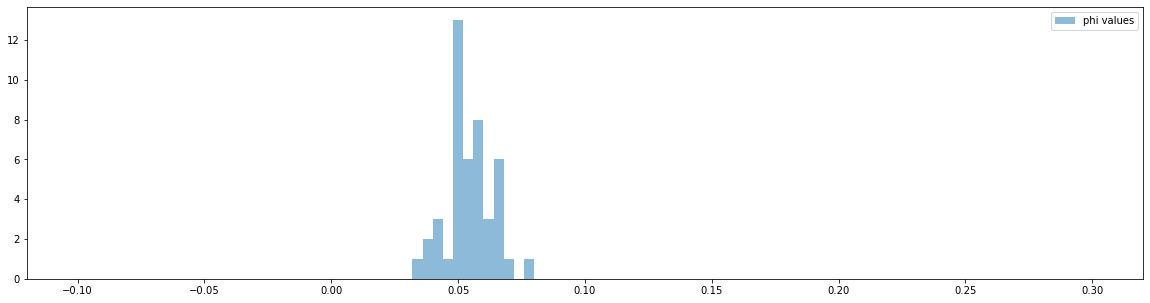

In [21]:
plt.figure(figsize=[20,5])
plt.hist( test, bins=100, range=[-0.1,0.3], label="phi values", alpha=0.5, density=False)
#plt.hist( phi_total2[1], bins=100, range=[-0.1,0.3], label="phi values", alpha=0.5, density=False)
#plt.hist( phi_total2[5], bins=100, range=[-0.1,0.3], label="phi values", alpha=0.5, density=False)
plt.legend(loc='upper right')
plt.show()

## visualizing expectation of phi depending on margin size

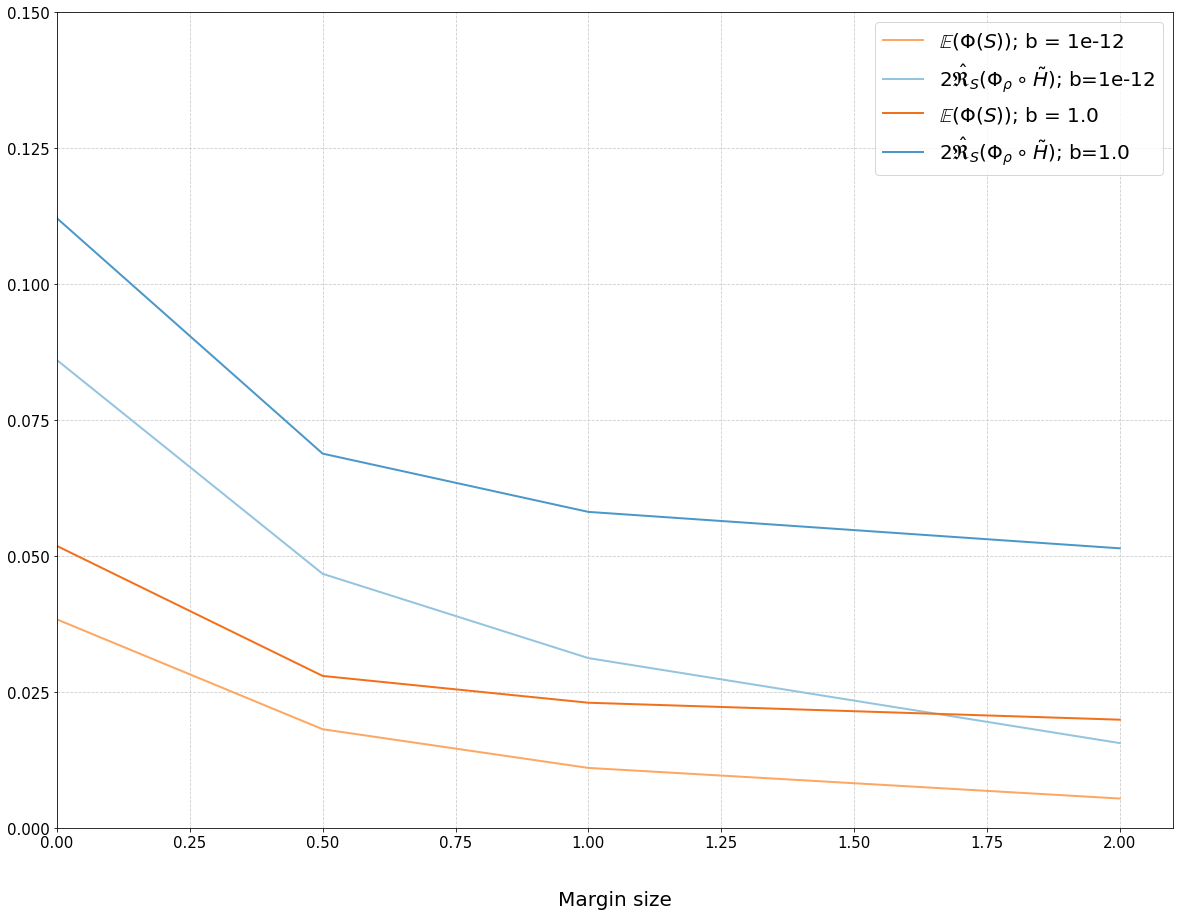

In [16]:
BOUNDS = np.array([1e-12, 1.0])
MARGINS = np.array([0, 0.5, 1.0, 2.0])

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

# for VIS_BOUND in VIS_BOUNDS:


plt.ylim(0,0.15)
plt.xlim(0,2.1)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.025))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)



plt.xlabel("Margin size", fontsize=20, labelpad=40)
#plt.ylabel("Expectation of Phi", fontsize=20, labelpad=40)
#plt.title("Expectation of Outlier function versus Rademacher Complexity, "+str(feat)+" features", fontsize=20, pad=40)

color_val = 0.2

for b in BOUNDS:
    color_val += 0.2
    color_main = cm.Oranges(color_val)
    color_sub = cm.Blues(color_val)
    
    # calc averages
    run = []
    for m in MARGINS:
        DATA_LOAD_NAME = 'histories/voice_phi/voice_'+str(feat)+'_phi_m' + str(m) + '_b' + str(b)
        run.append(np.mean(load_file(DATA_LOAD_NAME)))
    
    plt.plot(MARGINS, np.array(run), lw=2, label=r"$\mathbb{E} (\Phi(S))$; b = "+str(b), c=color_main)

    ####
    
    com = []
    for mar in MARGINS:

        h = load_file('histories/voice_'+str(feat)+'_500_maxiter100/margin_loss_b' + str(b) + '_m' + str(mar))
        com.append(calc_complexity(h) * 2)

    
    plt.plot(MARGINS, com, lw=2, c=color_sub, label=r"$2\hat{\mathfrak{R}}_{S}(\Phi_\rho \circ \tilde{H})$; b="+str(b))

    
    

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
    

plt.savefig("images/VOICE"+str(feat)+"_PHI.png", bbox_inches='tight')

plt.show()


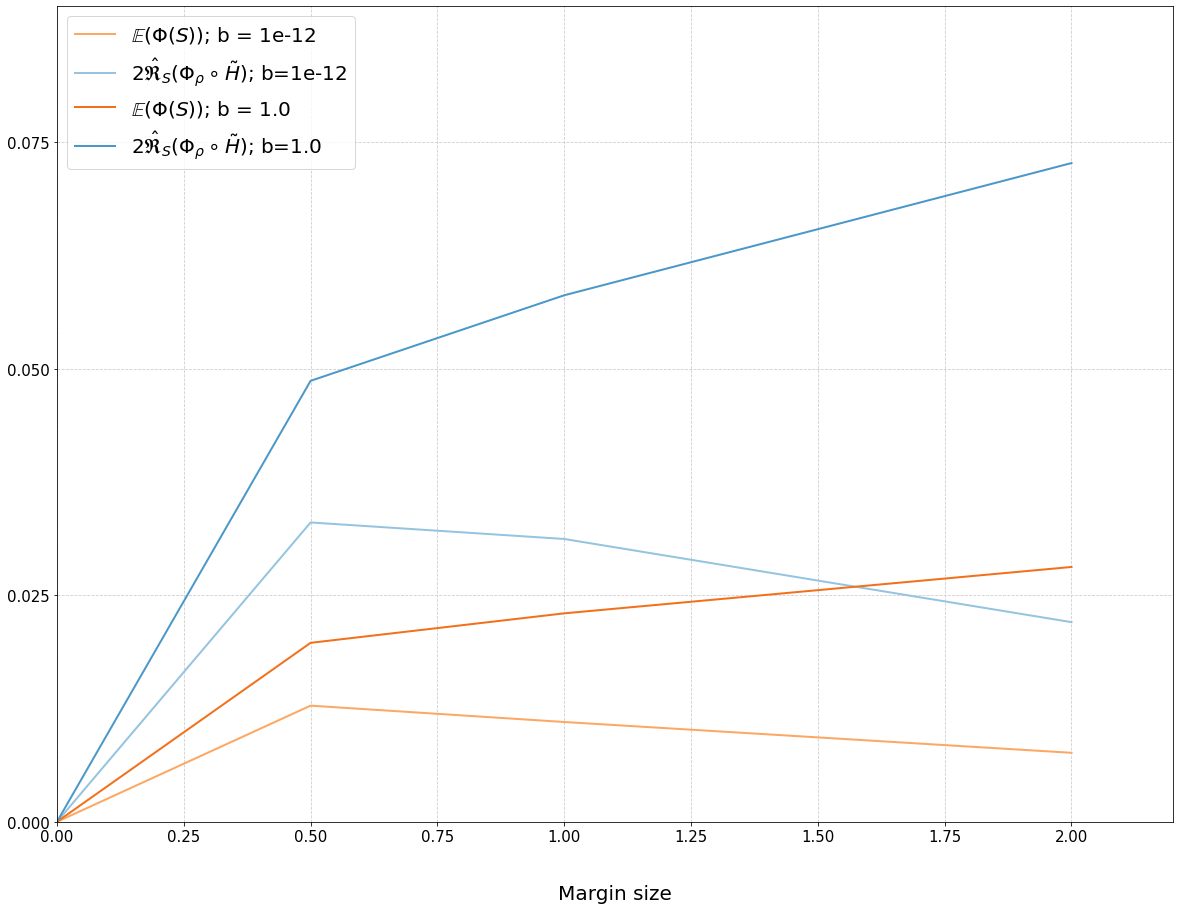

In [15]:
BOUNDS = np.array([1e-12, 1.0])
MARGINS = np.array([0, 0.5, 1.0, 2.0])

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

# for VIS_BOUND in VIS_BOUNDS:


plt.ylim(0,0.09)
plt.xlim(0,2.2)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.025))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)



plt.xlabel("Margin size", fontsize=20, labelpad=40)
#plt.ylabel("Expectation of Phi", fontsize=20, labelpad=40)
#plt.title("Expectation of Outlier function versus Rademacher Complexity, "+str(feat)+" features", fontsize=20, pad=40)

color_val = 0.2

for b in BOUNDS:
    color_val += 0.2
    color_main = cm.Oranges(color_val)
    color_sub = cm.Blues(color_val)
    
    # calc averages
    run = []
    for m in MARGINS:
        DATA_LOAD_NAME = 'histories/voice_phi/voice_'+str(feat)+'_phi_m' + str(m) + '_b' + str(b)
        run.append(np.mean(load_file(DATA_LOAD_NAME)))
    
    plt.plot(MARGINS, np.array(run) * np.sqrt(MARGINS), lw=2, label=r"$\mathbb{E} (\Phi(S))$; b = "+str(b), c=color_main)

    ####
    
    com = []
    for mar in MARGINS:

        h = load_file('histories/voice_'+str(feat)+'_500_maxiter100/margin_loss_b' + str(b) + '_m' + str(mar))
        com.append(calc_complexity(h) * 2)

    
    plt.plot(MARGINS, com * np.sqrt(MARGINS), lw=2, c=color_sub, label=r"$2\hat{\mathfrak{R}}_{S}(\Phi_\rho \circ \tilde{H})$; b="+str(b))

    
    

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
    

plt.savefig("images/VOICE"+str(feat)+"_PHI-e1.png", bbox_inches='tight')

plt.show()
